In [1]:

import dgl
import torch
import random
import os
import numpy as np
import networkx as nx
import torch.nn as nn
import torch.nn.functional as F
import torch as th
import matplotlib
from collections import OrderedDict, defaultdict
from dgl.nn.pytorch import GraphConv
from itertools import chain, islice, combinations
from networkx.algorithms.approximation.clique import maximum_independent_set as mis
from time import time
from networkx.algorithms.approximation.maxcut import one_exchange

# MacOS can have issues with MKL. For more details, see
# https://stackoverflow.com/questions/53014306/error-15-initializing-libiomp5-dylib-but-found-libiomp5-dylib-already-initial
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# fix seed to ensure consistent results
seed_value = 1
random.seed(seed_value)        # seed python RNG
np.random.seed(seed_value)     # seed global NumPy RNG
torch.manual_seed(seed_value)  # seed torch RNG

# Set GPU/CPU
TORCH_DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
TORCH_DTYPE = torch.float32
print(f'Will use device: {TORCH_DEVICE}, torch dtype: {TORCH_DTYPE}')

Will use device: cpu, torch dtype: torch.float32


{(0, 1): Text(-0.5497473792061034, 0.7312259948670438, '8'),
 (0, 2): Text(0.09480676122706669, 0.46259936537177826, '1'),
 (1, 3): Text(-0.47072680948410256, 0.037400634628221574, '1'),
 (2, 3): Text(0.17382733094906755, -0.23122599486704393, '1'),
 (2, 4): Text(0.6451983149004905, -0.47850351783897904, '1'),
 (3, 4): Text(0.2804691125626482, -0.7527224770280649, '1')}

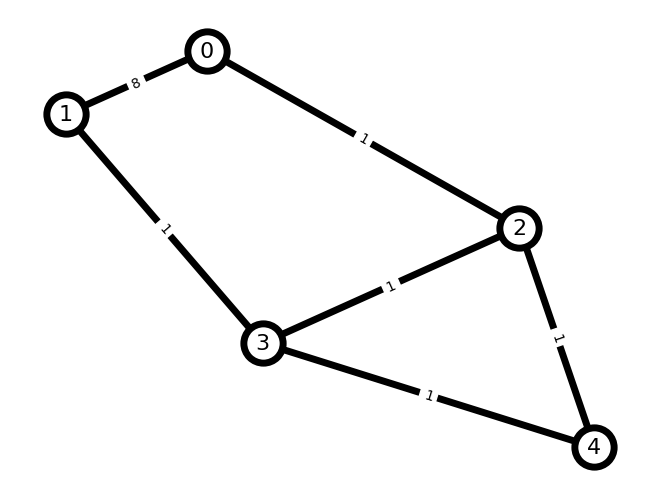

In [2]:
def CreateDummyFunction():
    test_graph = nx.Graph()
    test_graph.add_edges_from([(0,1, {"weight": 8}),(0,2, {"weight": 1}),(1,3, {"weight": 1}),(2,3, {"weight": 1}),(2,4, {"weight": 1}),(3,4, {"weight": 1})])
    test_graph.order()

#est_graph = nx.OrderedGraph([(0,1),(0,2),(1,3),(2,3),(2,4),(3,4)])
pos = nx.spring_layout(test_graph,seed=1)

# Visualize graph
options = {
    "font_size": 16,
    "node_size": 800,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}
nx.draw(test_graph, pos, with_labels=True, **options)

labels = nx.get_edge_attributes(test_graph,'weight')
nx.draw_networkx_edge_labels(test_graph,pos,edge_labels=labels)